# Cosmology HW1
## Dino Bektesevic 17.04.2019

In [1]:
import numpy as np
import pylab as plt
from scipy import integrate
import astropy.units as u
import astropy.constants as c
%matplotlib inline

## 1. Short answer (Each part should require minimal algebra.)
### a) What is the distance of a galaxy moving away at 10,000 km/s?  

$$\begin{align}
v &= Hr = \frac{10000 km/s}{70km/s/Mpc} \\
r &= 142.86Mpc
\end{align}$$
$$$$

### b) What is the redshift since when the Universe has expanded by a factor of 2?

$$\begin{align}
a_{em} &= \frac{1}{1+z} \\
\frac{1}{2} &= \frac{1}{1+z} \\
z &= 1
\end{align}$$

### c) What is the the redshift at which radiation and matter energy densities are equal? You can use that Ωm = 0.3 and Ωr= 0.0001. 

$$\begin{align}
\frac{H^2}{H^2_0} &= \frac{\Omega_{r,0}}{a^4} +\frac{\Omega_{m,0}}{a^3} \\
\frac{\Omega_{r,0}}{a^4} &= \frac{\Omega_{m,0}}{a^3} \\
\frac{a^3}{a^4} &= \frac{\Omega_{m,0}}{\Omega_{r,0}} \\
\frac{1}{a} &= 3000 \\
z &\approx 3000
\end{align}$$

### Assuming vacuum energy with ΩΛ= 0.7, what is the redshiftwhere the matter density equal to the dark energy density?

$$\frac{H^2}{H^2_0} = \frac{\Omega_{m,0}}{a^3} + \frac{1-\Omega_{m,0}-\Omega_{\Lambda,0}}{a^2} - \Omega_{\Lambda,0}$$

Since $1-\Omega_{m,0}-\Omega_{\Lambda,0} = 0$

$$\begin{align}
\frac{\Omega_{m,0}}{a^3} &= \Omega_{\Lambda,0} \\
a^3 &= \frac{0.3}{0.7} \\
a &= 0.754 \\
\frac{1}{1+z} &= 0.754 \\
z &= 0.32
\end{align}$$

### d) Sketch how would you calculate Ωr part c if I only gave you the present CMB temperatureof 2.7K?

* CMB temperature scales as
$$ T = T_0(1+z)$$
* Energy density $\epsilon$ is then approximately (CMB is just photons)
$$ \epsilon = aT^4 $$
* from definition of $\Omega_r$ we have:
$$\Omega_r = \frac{\epsilon}{\epsilon_c}$$
where $\epsilon_c$ is the critical energy density we cn get from a book, i.e. Ryden ch. 2.4/2.5.


### e) What was the temperature of the CMB at z = 1000 and $10^9$

From the scaling law for the temperature above we have:
$$z = 1000 \rightarrow T = 2727.75K$$
and
$$z = 10^9 \rightarrow T = 2.72\cdot10^9K$$
So temperature is order of magnitude of z.

## 2. Angular Diameter Distances
**Please  assume  the  concordance  cosmology  for  this  problem. Calculations in this cosmology generally require numerical evaluation. Feel free to check any numerical calculation using a cosmology calculator, but you should also code up the calculation yourself (using Mathematica is also fine).**

The provided code is easy to use and there is not much one can do to change it so I just used it. The only introduced change is the vectorization of `Dconf` - that way I don't have to worry if I sent a single number or an array of numbers. As a bonus I also get numpy arrays back so its easier to continue calculations with them, f.e. multiplying by a number doens't require a for loop or recasting it as np array again.

In [2]:
#cosmological parameters
h = 0.7
OmegaM=0.3
OmegaL = 1- OmegaM  #assumes flat
lightspeed = 3e5  #km/s

#Hubble function
def Hz(z):
    return 100*h*(OmegaM*(1+z)**3+OmegaL)**.5

#conformal distance
def Dconf(z):
    tmpf = lambda z: lightspeed*integrate.romberg(dConfDistdz, 0, z)
    vectmpf = np.vectorize(tmpf)
    return vectmpf(z)

def dConfDistdz(z):
    return 1./Hz(z)

#angular diameter distance
def DA(z):
    return Dconf(z)/(1+z) 

Text(0, 0.5, 'Mpc')

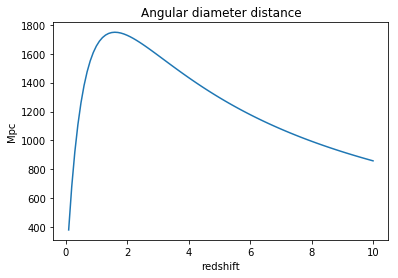

In [3]:
zarr = np.linspace(0.1,10, num=100)
plt.plot(zarr, DA(zarr)) 
plt.title('Angular diameter distance');
plt.xlabel('redshift')
plt.ylabel('Mpc')

### a)  Consider  a  galaxy-sized  object  of  fixed  radius  with R=  1  kpc.   Plot  its  angular  size  inarc-seconds if t is observed at z= 0.001−10.  

Angular size is given by $\theta = \frac{L}{d_A}$

Text(0, 0.5, 'arcsec')

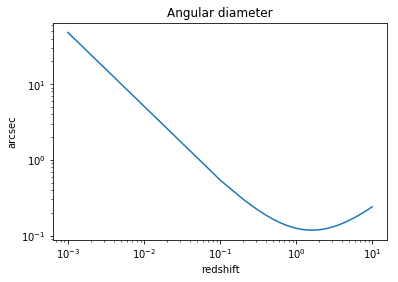

In [4]:
zarr = np.linspace(0.001, 10, num=100)
angsize = 0.001/DA(zarr)

plt.loglog(zarr, angsize*206265) 
plt.title('Angular diameter');
plt.xlabel('redshift')
plt.ylabel('arcsec')

### What is the redshift at which the object attains its minimum angular size?  What is that size?

In [5]:
rad2deg = 57.2958
deg2sec = 3600

minangsize = min(angsize)
minindex = np.where(angsize == min(angsize))[0]
atz = zarr[minindex[0]]

print(
      (f'Minimal recovered angular size of an object is {minangsize:.4} degrees'
      f'(~{minangsize*rad2deg*deg2sec:.4} arc-seconds) located at z={atz}')
     )

Minimal recovered angular size of an object is 5.718e-07 degrees(~0.1179 arc-seconds) located at z=1.617


### b) Calculate the comoving distance traveled from the beginning of time to z= 1000 assuming a velocity equal to c.  This istance is called the comoving “horizon”. 

This requires us to flip the integration boundaries essentially. Additionally we don't have the division by $1+z$ anymore either as its not an angular quantity. The integration method is also changed for one that supports improper integrals.

In [6]:
#conformal distance the other way around
def dconf(z):
    tmpf = lambda z: lightspeed*integrate.quad(dConfDistdz, z, np.inf)[0]
    vectmpf = np.vectorize(tmpf)
    return vectmpf(z)

def dH(z):
    return dconf(z)

dH(1000)

array(494.62442238)

### c) Observing from the present, what is the angle subtended by the comoving horizon at z=1000?

Following the same equations for angular quantities we used so far we have:
$\theta = \frac{L}{d_A}$
where L is the physical size of the object in question. In this case this is the longest distance light could have traveled from the observer in that time, aka the distance to horizon. 

$$d_H = \int_z^\infty \frac{cdz}{H(z)}$$

scaled by the scale factor, $a=1/(1+z)$, at that z:

$$L=ad_H$$

of course, given a cosmology $H\approx H_0\sqrt{\Omega_m+\Omega_\Lambda}$

In [10]:
a = 1/(1+1000)
horangsize = (dH(1000)*a)/DA(1000)

print(f'The distance to horizon at z=1000, today subtends an angle of ~{horangsize*rad2deg:.3} degrees')

The distance to horizon at z=1000, today subtends an angle of ~2.08 degrees


## 3. the expansion of the Universe
### a) Show that at late times in a ΛCDM cosmology (such as the one in problem 1), the scale factor increases exponentially with time.  This is what the pundits mean when they refer to “the accelerating universe”.

From definition of $H$:

$$\begin{align}
H &= \frac{\dot a}{a} \\
\int_{t_0}^t \frac{\dot a}{a}dt &= \int_{t_0}^t H dt\\
\ln{a}|_{t_0}^t &=  \int_{t_0}^t H dt \\
a|_{t_0}^t &= e^{ \int_{t_0}^t H dt }\\
\end{align}$$

The cosmology $H=H_0\sqrt{\Omega_\Lambda^{\frac{1}{z}}}$ approximates, in late time limit, to $H=H_0$ becuase in latetime the contribution from $\sqrt{\Omega_\Lambda}$ are very small. Since $H\approx H_0$ in latetime we can pull it out of the integral without incurring a lot of inaccuracy: 

$$\begin{align}
a|_{t_0}^t &= e^{ H_0\int_{t_0}^tdt }\\
a &= e^{ H_0(t-t_0)}
\end{align}$$

### b) Show using the Friedmann equations that as long as ρ+p/c2≥0, H(t) must increase monotonically in the past, regardless of what contribute to ρ and p at earlier epochs.

Writing out Friedman equations:

$$\begin{align}
H^2 = \left(\frac{\dot R}{R}\right)^2 = \left(\frac{\dot a}{a}\right)^2 & = \frac{8\pi G}{3}\rho + \frac{kc^2R_c^2}{R^2} \\
\frac{\ddot R}{R} = \frac{\ddot a}{a} &= - \frac{4\pi G}{3}\left(\rho + \frac{3P}{c^2}\right)
\end{align}$$

where $k=0$ for a flat universe, so the second term of 1st Friedman equation dissapears. We also know $H=\dot a/a$ so we use quotient rule to express $\dot H$. We want to look at the change of $H$ and we want to show that, if going back in time, $\dot H$ keeps decreasing. If $\dot H$ is monotonicaly decreasing going back in time, conversely it must mean that it is monotonically increasing going forward in time. 

$$\begin{align}
\frac{d}{dt} H &= \frac{\ddot a\dot a - \dot a\dot a}{a^2} \\
\frac{d}{dt} H &= \frac{\ddot a}{a} - \frac{\dot a^2}{a^2} \\
\frac{d}{dt} H &= -\frac{4\pi G}{3}\left(\rho + \frac{3P}{c^2}\right) - \frac{8\pi G}{3}\rho \\
\frac{d}{dt} H &= -\frac{4\pi G}{3}\left(-\rho - \frac{3P}{c^2} - 2\rho \right) \\
\frac{d}{dt} H &= \frac{4\pi G}{3}\left(-3\rho - \frac{3P}{c^2} \right) \\
\frac{d}{dt} H &= -4\pi G\left(\rho + \frac{P}{c^2} \right) < 0
\end{align}$$ 

Since it was given to us by the problem that we can assume $\left(\rho + \frac{P}{c^2} \right)$ that expression will always be negative. QED.

## 4. Densities and sizes. 

**For this problem, assume that Ωb= 0.05, Ωm= 0.3,H0= 70km/s/Mpc, and that 25% by mass of all the baryons are helium.**

### a) Calculate the present number densities of hydrogen and helium using the above numbers.  

Since we can write $\epsilon_{b,0} = c^2 \rho_{b,0}$:
$$\begin{align}
\Omega_{b,0} &= \frac{\epsilon_{b,0}}{\epsilon_c} \\
\rho_{b,0} &= \frac{\Omega_{b,0}\epsilon_c}{c^2}
\end{align}$$

the value for $\epsilon_c$ we find in Ryden $\epsilon_C = 8.3 ± 1.7 \cdot 10^{−10} J m^{-3}$ giving us

$$\rho_{b,0} = 4.611\cdot 10^{-28} kgm^{-3}$$

Which we cast into number density by, first by respecting the mass ratios $\rho_{H,0} = 0.75\rho_{b,0}$, and then:

$$n_{H,0} = \rho_{b,0}\frac{N_A}{m_H} = \rho_{b,0}\frac{6.022\cdot10^{23}}{1.008\cdot10^{-3}}$$

giving $n_{H,0} = 0.2066m^{-3}$. Same applies for hydrogen, except the mass ratio factor, giving us $n_{He,0} = 0.0688m^{-3}$

### Compare this density to the sea-level density of molecules in Earth’s atmosphere. 

Molecules in air are uncomparably more denser, having close to $10^{27}m^{−3}$ molecules. 

### At what redshift would the number density of hydrogen be equal o the number density of moleculesin our atmosphere?

Starting from energy density scaling:
$$\begin{align}
\epsilon &= \frac{\epsilon_{b,uni}}{a^3} \\
a &= \left(\frac{\epsilon_{b,0}}{\epsilon}\right)^{1/3} \\
a &= \left(\frac{\rho_{b,uni}}{\rho_b}\right)^{1/3} \\
a &= \left(\frac{n_{b,uni}}{n_b}\right)^{1/3} = \frac{1}{1+z}
\end{align}$$

Giving us $z=1693210396$ or $z\approx10^9$.

### b) Calculate the comoving radius of a sphere in megaparsecs that, at the average cosmic density, has a halo mass of a dwarf galaxy with mass $10^{10}$M, a Milky Way mass galaxy with $10^{12}$M, anda galaxy cluster with $10^{15}$M.

A universe is flat if it has a density equal to its critical density: 
$$\rho_c=\frac{3H_0^2}{8\pi  G}$$
Since we're dealing with comoving radius we can just apply the "regular" equations for density $\rho = m/V$, which give us:
$$\begin{align} 
V &= \frac{4}{3}\pi r^3 = \frac{m}{\rho} \\
r &= \left( \frac{3}{4\pi} \frac{m}{\Omega_m\rho_c} \right)^{1/3}
\end{align}$$
where $\Omega_m$ appears only to scale the critical density that includes other contributions as well. 

In [8]:
H0 = 70*u.km/u.s/u.Mpc
rhoc2 = (3/(8*np.pi*c.G))*H0**2
rhoc2.si

<Quantity 9.20417731e-27 kg / m3>

In [9]:
Omega_m = 0.3
mass = np.array([10**10, 10**12, 10**15]) * u.M_sun

r = lambda m: (3/(4*np.pi) * m/(Omega_m*rhoc2))**(1/3)
r(mass).to(u.Mpc)

<Quantity [ 0.38823193,  1.80201299, 18.02012987] Mpc>